In [1]:
import squidpy as sq
from anndata import AnnData
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
from numpy.random import default_rng
import matplotlib.pyplot as plt
import pathlib
import warnings
warnings.filterwarnings('ignore')

In [2]:
sample_id = "A6"
adata = sc.read_visium("./", count_file=f"filtered_feature_bc_matrix.h5")

adata

AnnData object with n_obs × n_vars = 346 × 33538
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [3]:
adata.var_names_make_unique()
adata.var["MT"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["MT"], inplace=True)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


<Axes: xlabel='n_genes_by_counts'>

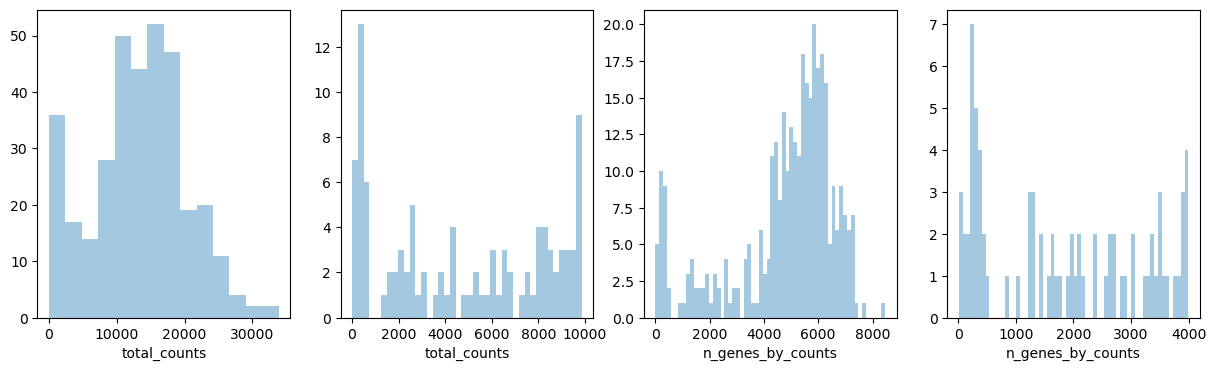

In [4]:
fig, axs = plt.subplots(1, 4, figsize=(15, 4))
sns.distplot(adata.obs["total_counts"], kde=False, ax=axs[0])
sns.distplot(
    adata.obs["total_counts"][adata.obs["total_counts"] < 10000],
    kde=False,
    bins=40,
    ax=axs[1],
)
sns.distplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[2])
sns.distplot(
    adata.obs["n_genes_by_counts"][adata.obs["n_genes_by_counts"] < 4000],
    kde=False,
    bins=60,
    ax=axs[3],
)

In [5]:
sc.pp.filter_cells(adata, min_counts=2000)
sc.pp.filter_genes(adata, min_cells=10)

In [6]:
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=4000)


In [7]:
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution=0.7)

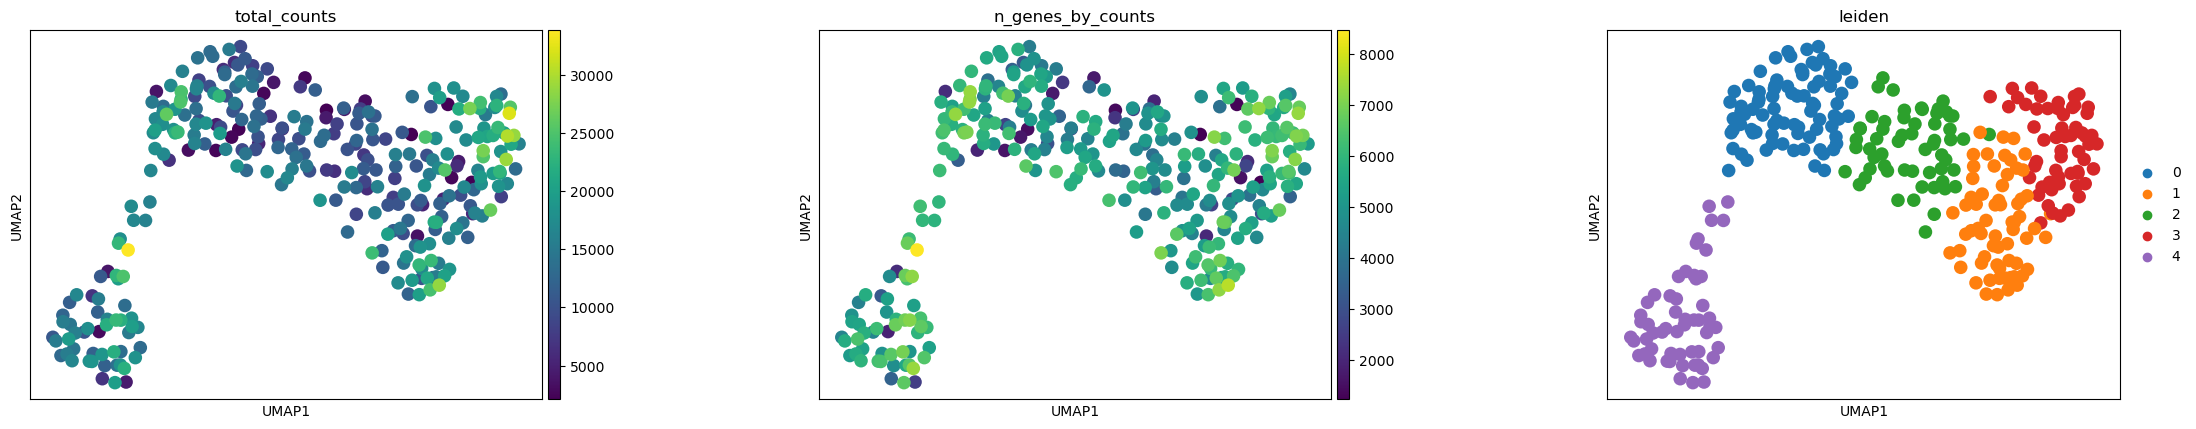

In [8]:
sc.pl.umap(adata, color=["total_counts", "n_genes_by_counts", "leiden"], wspace=0.4)

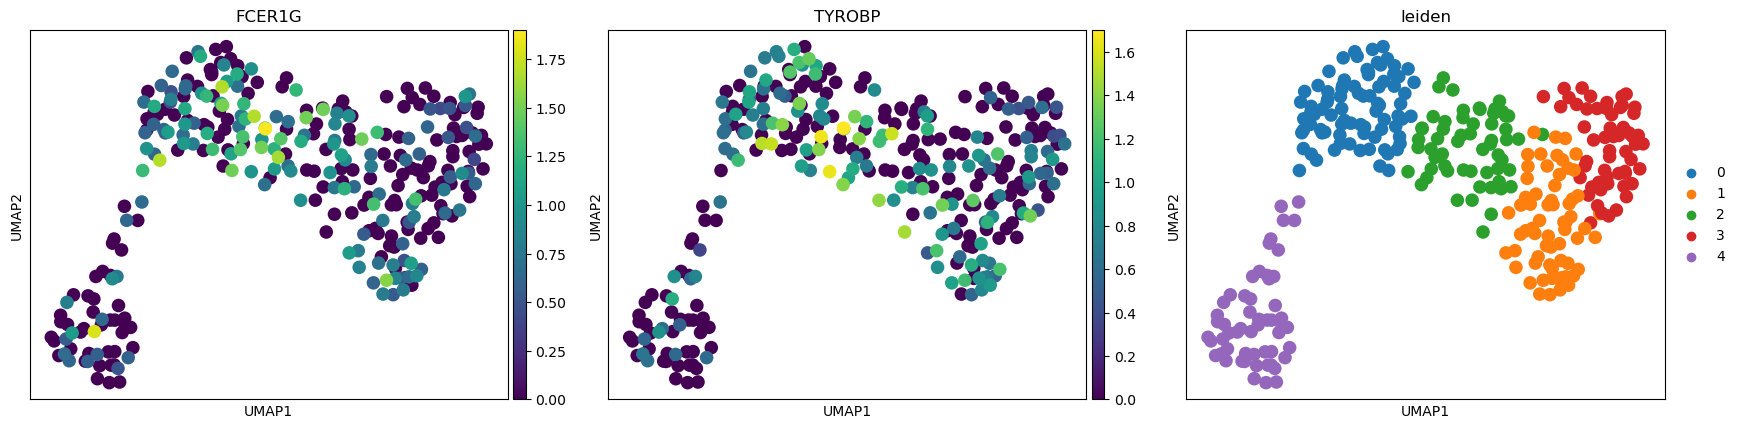

In [9]:
sc.pl.umap(adata, color=["FCER1G", "TYROBP", "leiden"], wspace=0.1)

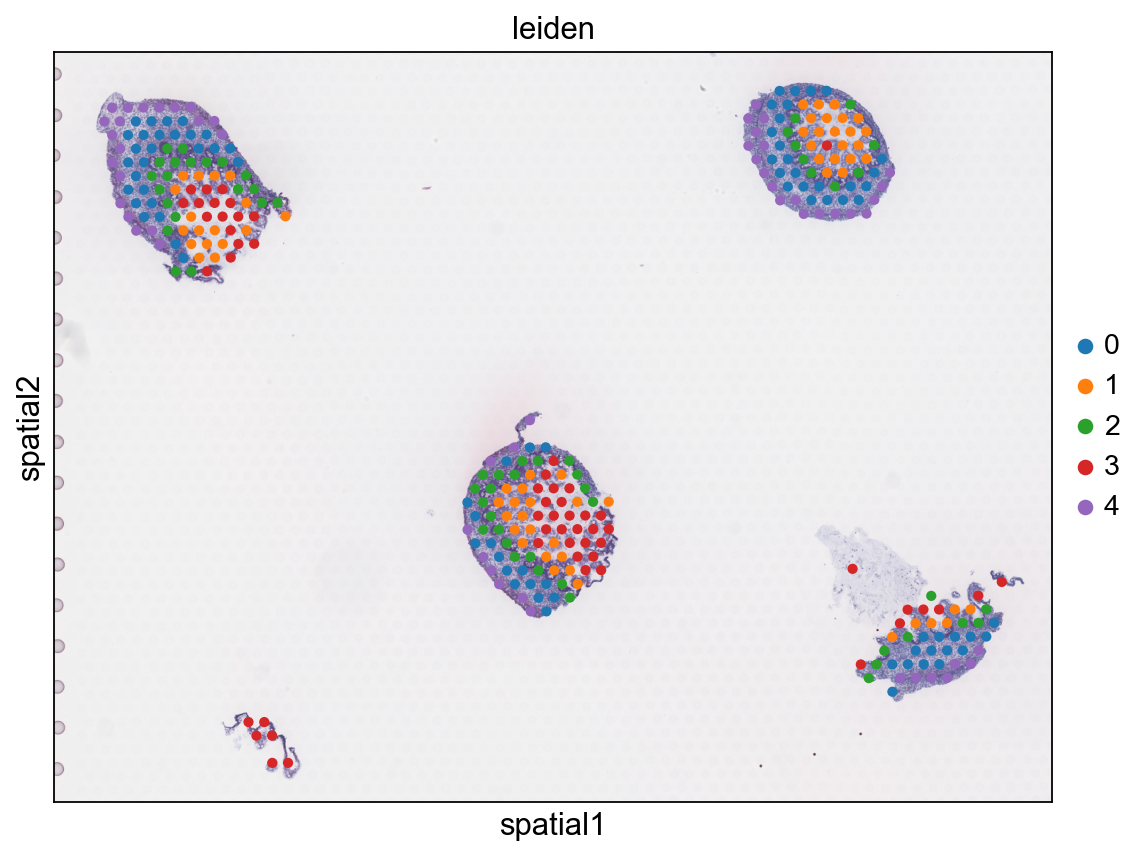

In [10]:
sc.set_figure_params(facecolor="white", figsize=(8, 8))
sc.pl.spatial(adata, color="leiden")

In [11]:
annotation = {
    "0": "Cluster_0",
    "1": "Cluster_1",
    "2": "Cluster_2",
    "3": "Cluster_3",
    "4": "Cluster_4",
}

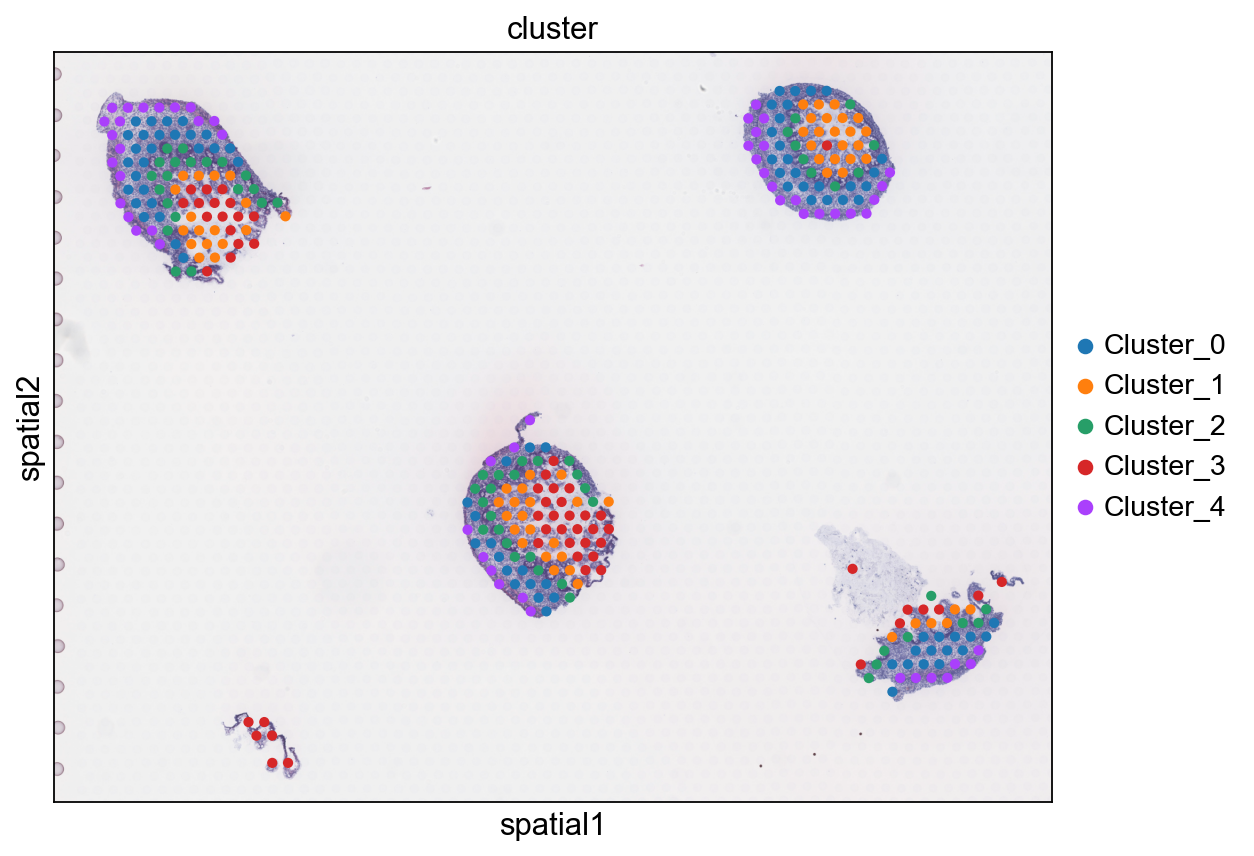

In [12]:
adata.obs["cluster"] = pd.Categorical(adata.obs.leiden.replace(annotation))
sc.pl.spatial(adata, color="cluster")

In [13]:
adata

AnnData object with n_obs × n_vars = 315 × 14749
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'n_counts', 'leiden', 'cluster'
    var: 'gene_ids', 'feature_types', 'genome', 'MT', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'spatial', 'hvg', 'log1p', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'cluster_colors'
    obsm: 'spatial', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'